# Import Libraries

In [1]:
import pandas as pd # library for open files
import numpy as np # Library for mathematical operations
import matplotlib.pyplot as plt # Library for graph
import seaborn as sns # Library for graph

from sklearn.preprocessing import StandardScaler # for scaling data
from sklearn.model_selection import train_test_split # to split data for training & testing
from sklearn.tree import DecisionTreeClassifier # classification with decision tree
from sklearn.metrics import accuracy_score # to get the accuracy score

# Load Data

In [2]:
#                                           Path                                             File Name  Extension
path = r'D:\Abdulrhman Osama\Machine Learning Projects\Framingham Heart Study Classification\framingham.csv'

df = pd.read_csv(path)

print('Data Frame:')
df.head(10).T # show the first ten rows from the data

Data Frame:


,0,1,2,3,4,5,6,7,8,9
male,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,1.00,1.00
age,39.00,46.00,48.00,61.00,46.0,43.0,63.00,45.00,52.00,43.00
education,4.00,2.00,1.00,3.00,3.0,2.0,1.00,2.00,1.00,1.00
currentSmoker,0.00,0.00,1.00,1.00,1.0,0.0,0.00,1.00,0.00,1.00
cigsPerDay,0.00,0.00,20.00,30.00,23.0,0.0,0.00,20.00,0.00,30.00
BPMeds,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
prevalentStroke,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
prevalentHyp,0.00,0.00,0.00,1.00,0.0,1.0,0.00,0.00,1.00,1.00
diabetes,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
totChol,195.00,250.00,245.00,225.00,285.0,228.0,205.00,313.00,260.00,225.00


In [3]:
df.shape # Show the number of rows & columns

(4238, 16)

# Cleaning Data

In [4]:
df.isnull().sum() # Check if there any empty slots in the data or any nulls or not

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
new_df = df.dropna(axis = 0, how = 'any') # Drop all the rows if there any column of that row has null value

In [6]:
new_df.head(10).T # show the first ten rows from the data

,0,1,2,3,4,5,6,7,8,9
male,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,1.00,1.00
age,39.00,46.00,48.00,61.00,46.0,43.0,63.00,45.00,52.00,43.00
education,4.00,2.00,1.00,3.00,3.0,2.0,1.00,2.00,1.00,1.00
currentSmoker,0.00,0.00,1.00,1.00,1.0,0.0,0.00,1.00,0.00,1.00
cigsPerDay,0.00,0.00,20.00,30.00,23.0,0.0,0.00,20.00,0.00,30.00
BPMeds,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
prevalentStroke,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
prevalentHyp,0.00,0.00,0.00,1.00,0.0,1.0,0.00,0.00,1.00,1.00
diabetes,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
totChol,195.00,250.00,245.00,225.00,285.0,228.0,205.00,313.00,260.00,225.00


In [7]:
new_df.isnull().sum() # Check if there any empty slots in the data or any nulls or not

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
new_df.shape # Show the number of rows & columns

(3656, 16)

In [9]:
new_df.describe().T # describe the data by the minimum, maximum, the number of it, mean, standard deviation, etc...

,count,mean,std,min,25%,50%,75%,max
male,3656.0,0.443654,0.496883,0.00,0.00,0.00,1.00,1.0
age,3656.0,49.557440,8.561133,32.00,42.00,49.00,56.00,70.0
education,3656.0,1.979759,1.022657,1.00,1.00,2.00,3.00,4.0
currentSmoker,3656.0,0.489059,0.499949,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3656.0,9.022155,11.918869,0.00,0.00,0.00,20.00,70.0
BPMeds,3656.0,0.030361,0.171602,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3656.0,0.005744,0.075581,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3656.0,0.311543,0.463187,0.00,0.00,0.00,1.00,1.0
diabetes,3656.0,0.027079,0.162335,0.00,0.00,0.00,0.00,1.0
totChol,3656.0,236.873085,44.096223,113.00,206.00,234.00,263.25,600.0


In [10]:
new_df.info() # Gives information about the data (string, integer, float, etc...)

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [11]:
duplicared_rows = new_df[new_df.duplicated()] # Check if there any duplicated rows
print(f'The number of duplicated rows is: {duplicared_rows.shape[0]}')

The number of duplicated rows is: 0


In [12]:
X = new_df.iloc[ : , : -1] # from column 1 to column 15 (Features)
Y = new_df.iloc[ : , -1] # the last column only (TenYearCHD)

In [13]:
X.head(10) # show the first ten rows from the data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0


In [14]:
Y.head(10) # show the first ten rows from the data

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: TenYearCHD, dtype: int64

# Data Analysis

In [15]:
TenYearCHD_Data = new_df['TenYearCHD'].value_counts()

TenYearCHD_Data

TenYearCHD
0    3099
1     557
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

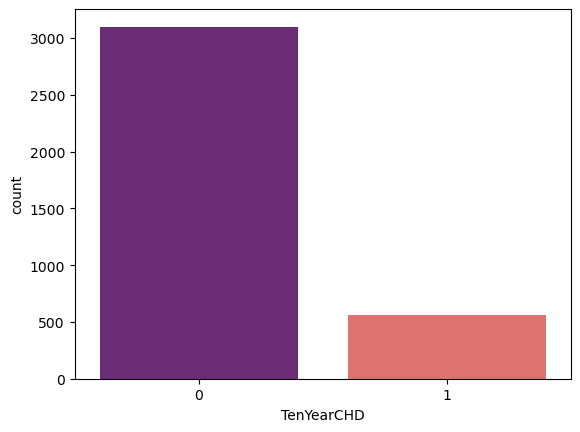

In [16]:
sns.countplot(x = 'TenYearCHD', palette = 'magma', data = new_df)

Text(0.5, 1.0, 'Age:')

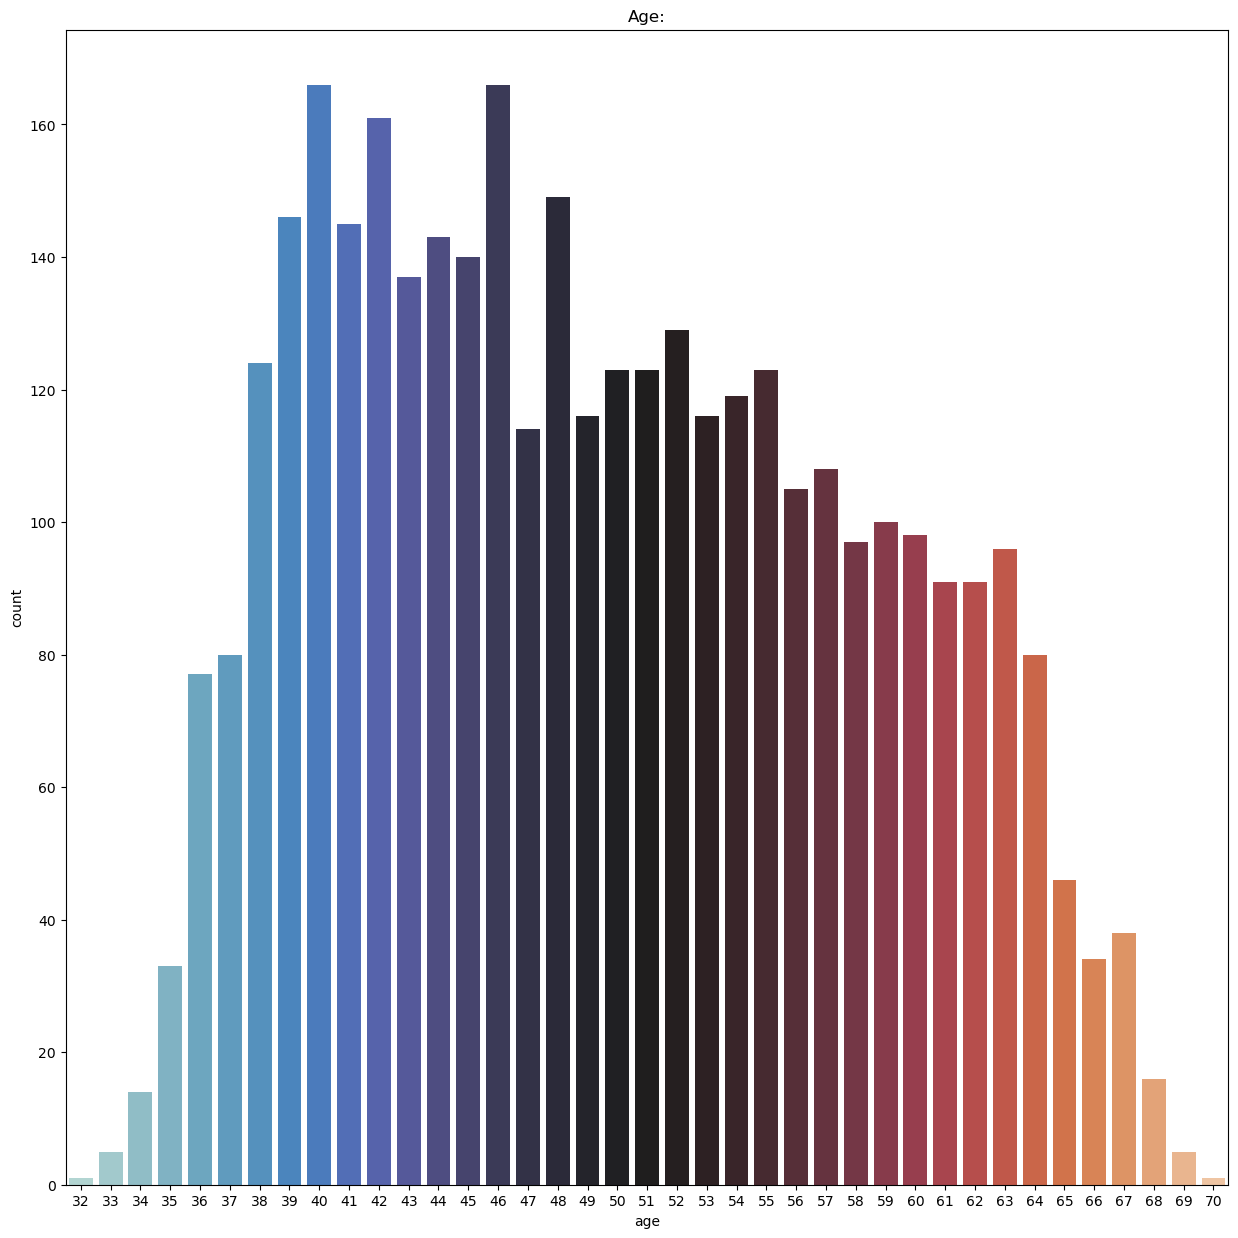

In [17]:
plt.subplots(figsize = (15, 15))
sns.countplot(x = 'age', palette = 'icefire', data = new_df)
plt.title('Age:')

In [18]:
Male_Data = new_df['male'].value_counts()

Male_Data

male
0    2034
1    1622
Name: count, dtype: int64

In [19]:
Education_Data = new_df['education'].value_counts()

Education_Data

education
1.0    1526
2.0    1101
3.0     606
4.0     423
Name: count, dtype: int64

In [20]:
CurrentSmoker_Data = new_df['currentSmoker'].value_counts()

CurrentSmoker_Data

currentSmoker
0    1868
1    1788
Name: count, dtype: int64

In [21]:
Diabetes_Data = new_df['diabetes'].value_counts()

Diabetes_Data

diabetes
0    3557
1      99
Name: count, dtype: int64

Text(0.5, 1.0, 'Does the patient has a diabetes?')

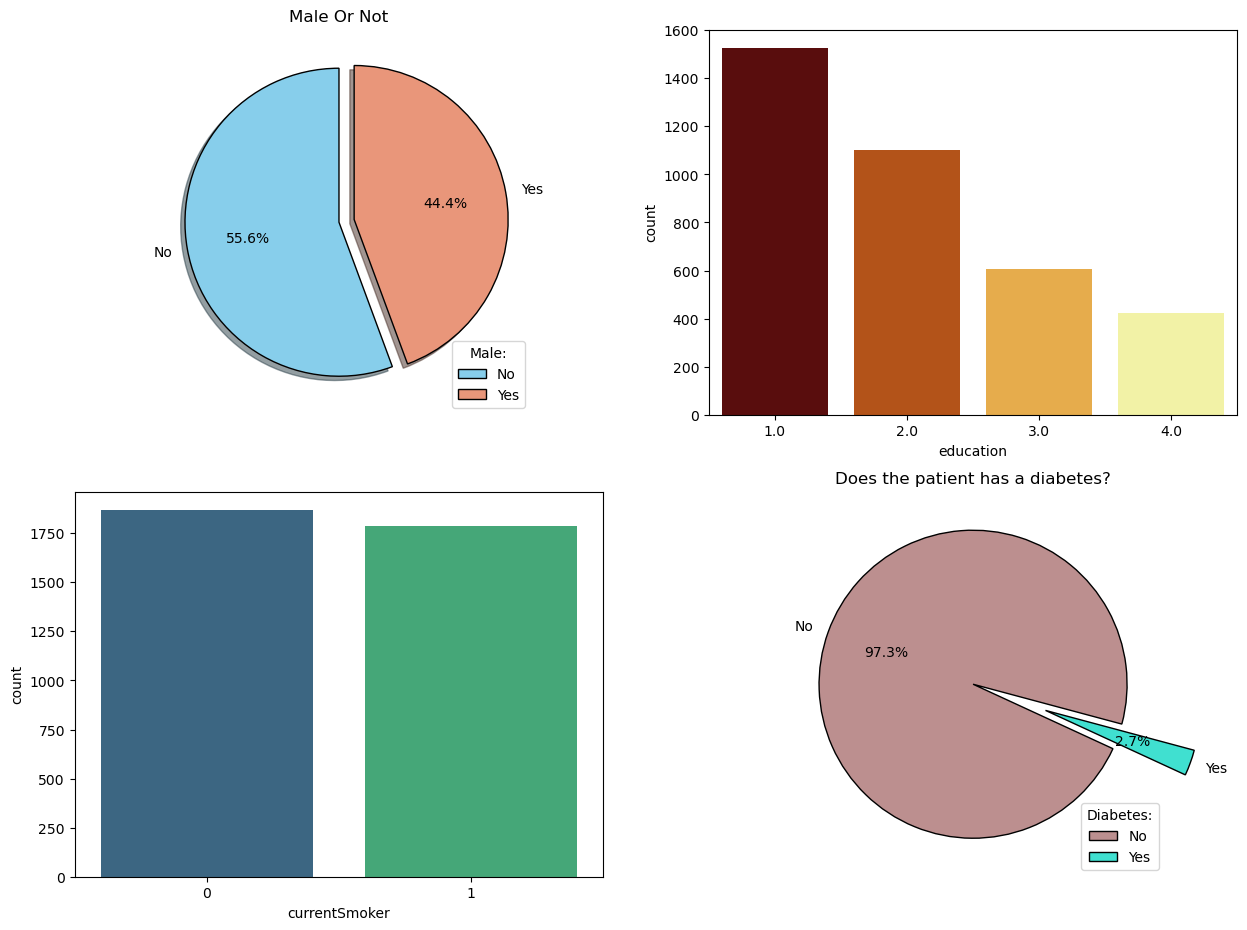

In [22]:
plt.figure(figsize = (15, 11))

plt.subplot(2, 2, 1)
Male_Data.plot(kind = 'pie', ylabel = '', startangle = 90, autopct = '%1.1f%%', colors = ['skyblue', 'darksalmon'],
              labels = ['No', 'Yes'], explode = (0, 0.1), wedgeprops = {'edgecolor' : 'black', 'linewidth' : 1}, shadow = True)
plt.legend(title = 'Male:', loc = 'lower right')
plt.title('Male Or Not')

plt.subplot(2, 2, 2)
sns.countplot(x = 'education', palette = 'afmhot', data = new_df)

plt.subplot(2, 2, 3)
sns.countplot(x = 'currentSmoker', palette = 'viridis', data = new_df)

plt.subplot(2, 2, 4)
Diabetes_Data.plot(kind = 'pie', ylabel = '', startangle = 345, autopct = '%1.1f%%', colors = ['rosybrown', 'turquoise'],
                  labels = ['No', 'Yes'], explode = (0, 0.5), wedgeprops = {'edgecolor' : 'black', 'linewidth' : 1}, shadow = False)
plt.legend(title = 'Diabetes:', loc = 'lower right')
plt.title('Does the patient has a diabetes?')

# Data Scaling

In [23]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [24]:
X[1]

array([-0.8929969 , -0.41559058,  0.01979497, -0.97835241, -0.75706763,
       -0.17695114, -0.07600767, -0.67269818, -0.16683058,  0.29772868,
       -0.5146366 , -0.15969535,  0.7246142 ,  1.60828949, -0.24495595])

# Data Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30, shuffle = True)

In [26]:
X_train

array([[ 1.11982472,  0.75263883, -0.95818334, ...,  0.61884242,
        -1.06253627,  0.13150507],
       [-0.8929969 , -1.23335117,  1.97575158, ..., -1.29734866,
         1.6917528 , -0.66324597],
       [-0.8929969 ,  0.16852412,  0.01979497, ...,  0.60654338,
         0.35633992, -0.28678495],
       ...,
       [ 1.11982472, -0.1819447 ,  0.01979497, ...,  0.24741129,
        -0.06097661, -0.16129794],
       [-0.8929969 ,  0.16852412,  0.01979497, ..., -1.14238071,
         0.35633992, -0.11946894],
       [-0.8929969 , -0.99970529,  1.97575158, ..., -0.86934192,
         0.77365644, -0.11946894]])

In [27]:
Y_train

768     0
283     0
2350    0
3926    0
562     0
       ..
1345    1
579     1
3476    0
489     0
2141    0
Name: TenYearCHD, Length: 2559, dtype: int64

In [28]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (2559, 15)
X_test shape: (1097, 15)
Y_train shape: (2559,)
Y_test shape: (1097,)


# Use Decision Tree

In [29]:
tree_model = DecisionTreeClassifier()

In [30]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [1, 2, 3, 4, 5]
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
cv = GridSearchCV(tree_model, parameter, scoring = 'accuracy', cv = 5)

In [33]:
cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [34]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [35]:
Y_predtree = cv.predict(X_test)

In [36]:
print(f'Train accuracy: {round(accuracy_score(Y_train, cv.predict(X_train)), 2) * 100}')

print(f'Test accuracy: {round(accuracy_score(Y_test, cv.predict(X_test)), 2) * 100}')

Train accuracy: 86.0
Test accuracy: 85.0


# Thank You

# Eng. Abdulrhman Osama